# Tutorial on Keras Tuner
# ===================

Keras Tuner helps us tune HyperParameters.

Conceptually, hyper-parameter tuning is just an optimization loop on top of ML model learning to find the set of hyper-parameters leading to the lowest error on the validation set.

As opposed to the optimization algorithm of the ML model, no gradient is computed, so the hyper-parameter optimization algorithm cannot rely on it to lower the validation error. Instead, it must blindly try a new configuration in the search space or make an educated guess of where the most interesting configuration might be. It is why these optimizers are called black-box optimizers. 

There are basically two types of parameters, the first kind are the ones LEARNED y the Network, like the weights which are updated based on the loss optimisation.
The second kind are the Key driving aspects of the network, like the:

Learning rate

Dropout rate 

Number of layers

Numbers of neurons in each layer

Optimisers

Loss functions

Tuning them manually is a lot of effort, and thanks to keras Tuner , we dont have to anymore............

# Classes of algorithms
The hyper-parameter optimization algorithms can be separated into three main categories, namely : 

1.exhaustive search of the space

2.surrogate models 

3.some algorithms mixing some ideas of the two previous categories and specifically dedicated to hyper-parameters tuning.

# Installation
# =========

!pip install -q -U keras-tuner

import kerastuner as kt

# Defining a model 
# ==============
A CNN model consists of Convolution layers with a certain number of filters each , the activtions used generally are relu, we ll have to test out with combinations of Batch Normalisation , Pooling and then the flattened layer over to the Dense layers with dropout  

First we have gotto define a model builder function that returns a model. This function takes in an argument "hp" 


Below is a Sequential model with tuner Search Space components defined


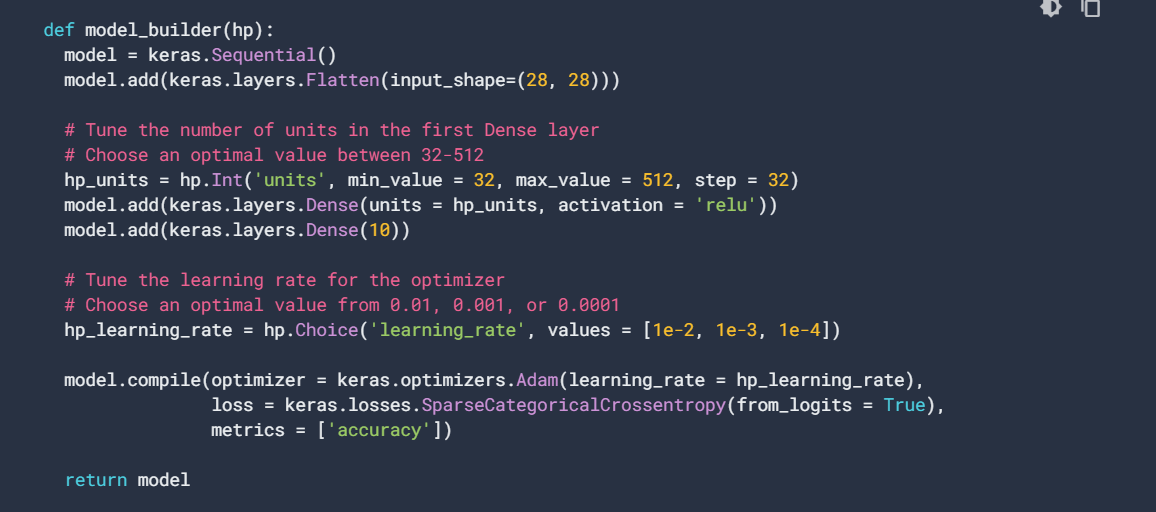

# hp_units = hp.Int('units', min_value = 32, max_value = 512, step = 32)

hp.Int allows us to define a range of values to be tested , the search space is for parameter, "units" with defining the min, max and step size

#   hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]) 

hp.Choice is used to select between a few values rather than testing the entire range of values

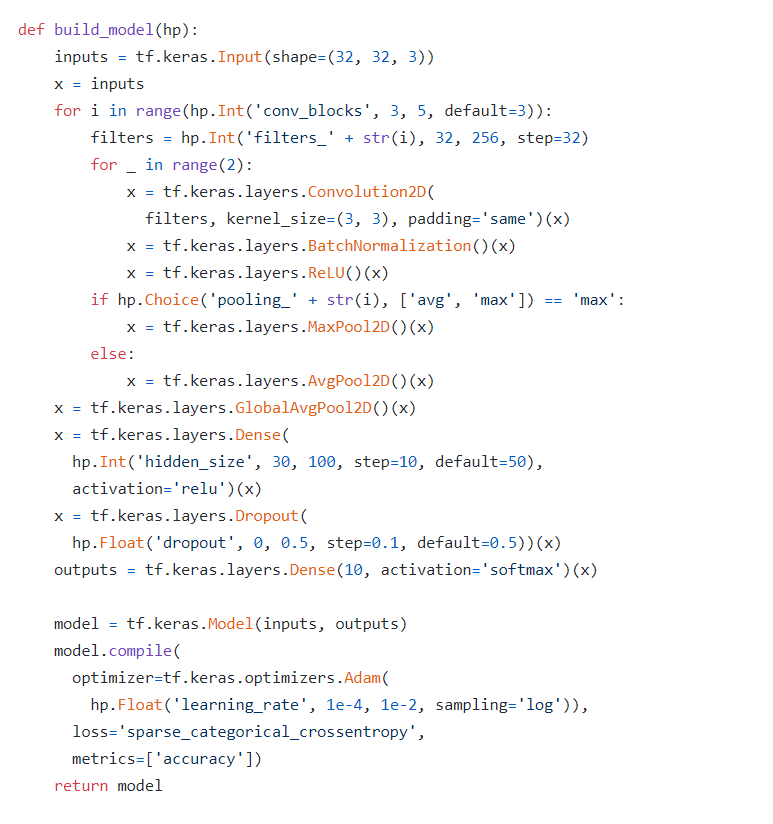

# The above  CNN Model is from keras-team's github pages

The above model has ( Conv2D-BatchNorm-Relu-Pooling )*x - GlobalAvg - Dense - Dropout - Dense(Output layer)



#     for i in range(hp.Int('conv_blocks', 3, 5, default=3)):

The loop is used to tune the number of layers , here we hav a  minimum of 3 conv blocks to a maximum of 5 blocks


# for _ in range(2):

For each conv block we have two sets of conv-norm-relu-pool layers are added to the pipeline

# hp.Float('dropout', 0, 0.5, step=0.1, default=0.5))(x)

Floating point range, can be evenly divided.



#  Tuner Instantiation
# ================

There are four tuners : 
Random Search

Bayesian Optimisation

Hyperband

sklearn


# Objective 
# ========
This is the metric ased on which the tuning is done. Objective eing otaining the maximum validation accuracy

The model_builder is the method that defines the model 

# Algorithms dedicated to hyper-parameter tuning
# ========================================

# 1. HYPERBAND  Tuning
# ==================

#
Hyperband extends the SuccessiveHalving algorithm proposed for hyperparameter
optimization by Jamieson and Talwalkar (2015) and calls it as a subroutine. The idea
behind the original SuccessiveHalving algorithm follows directly from its name: uniformly
allocate a budget to a set of hyperparameter configurations, evaluate the performance of
all configurations, throw out the worst half, and repeat until one configuration remains.
The algorithm allocates exponentially more resources to more promising configurations.
Unfortunately, SuccessiveHalving requires the number of configurations n as an input
to the algorithm. Given some finite budget B (e.g., an hour of training time to choose a
hyperparameter configuration), B/n resources are allocated on average across the configurations

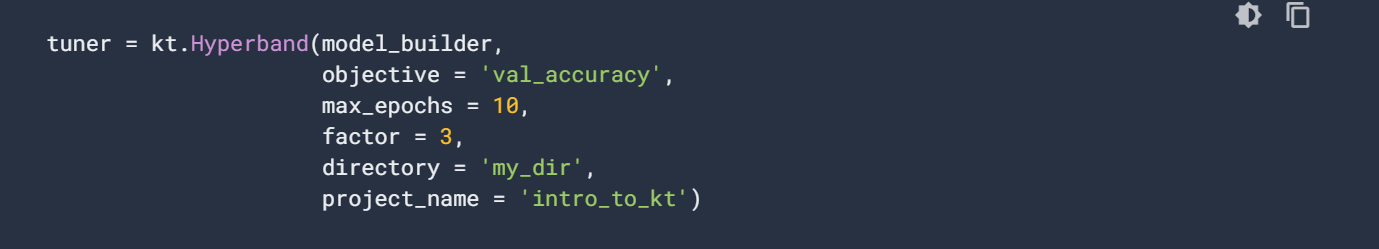

# Exhaustive search of the search space
# ================================

# 1.GRID SEARCH
# ==============

The search space of each hyper-parameter is discretized, and the total search space is discretized as the Cartesian products of them. Then, the algorithm launches a learning for each of the hyper-parameter configurations, and selects the best at the end. It is an embarrassingly parallel problem (provided one has the computing power needed to train several models at the same time) but suffers from the curse of dimensionality (the number of configurations to try is exponential with regards to the number of hyper-parameters to be optimized).

# 2. Random Search
# =============

A variation of the previous algorithm, which randomly samples the search space instead of discretizing it with a Cartesian grid. The algorithm has no end. Instead a time budget has to be specified (in other words, a number of trials). This algorithm suffers likewise from the curse of dimensionality to reach a preset fixed sampling density. One of the advantages of random search is that if two hyper-parameters are little correlated, random search enables to find more precisely the optima of each parameters

#
Random search and grid search are an attractive first option for optimization. They are very easy to code, can be run in parallel and they do not need any form of tuning. Their drawback is that there is no guarantee of finding a local minimum to some precision except if the search space is thoroughly sampled. This does not pose any problem if the model is very fast to run and the number of hyper-parameters is low. If the model takes a significant time to run using a lot of computational resources, random or grid search are inefficient as they do not use the information gained by all the previous tries.

# Surrogate Models
# ===============

A surrogate model of the validation loss as a function of the hyper-parameters can be fit to the previous tries, and tell where the local minimum might be. These methods are called Sequential Model-Based Optimization (SMBO).

# Bayesian Optimisation
# ==================

Bayesian optimization can only work on continuous hyper-parameters, and not categorical ones. 

Bayesian Optimization provides a principled technique based on Bayes Theorem to direct a search of a global optimization problem that is efficient and effective. It works by building a probabilistic model of the objective function, called the surrogate function, that is then searched efficiently with an acquisition function before candidate samples are chosen for evaluation on the real objective function.

to view hyperparameters tuning as the optimization of a black-box function. Here, the function to optimize is the model’s final prediction score, accuracy for instance, on a held-out test set. Any global optimization framework can then be applied to minimize it. Bayesian optimization was deemed to be a good choice in different papers (see links at the end of the post). It also has the advantage of having available implementations online (see last paragraph).

Like for random search, a Bayesian optimizer samples a subset of hyperparameters combinations. The difference with randomized grid search resides in the way each combination is chosen.

The main idea resides in constructing a probabilistic representation of the machine learning algorithm’s performance. In Bayesian optimization, the performance function is modeled as a sample from a Gaussian process (GP) over the hyperparameter value. The posterior distribution for this function allows insight in the confidence of the function’s value in the hyperparameter space 

# Tuner's search
# ============

Arguments are the ones we give to model.fit : INput images, labels, Validation data, epochs and batch_size



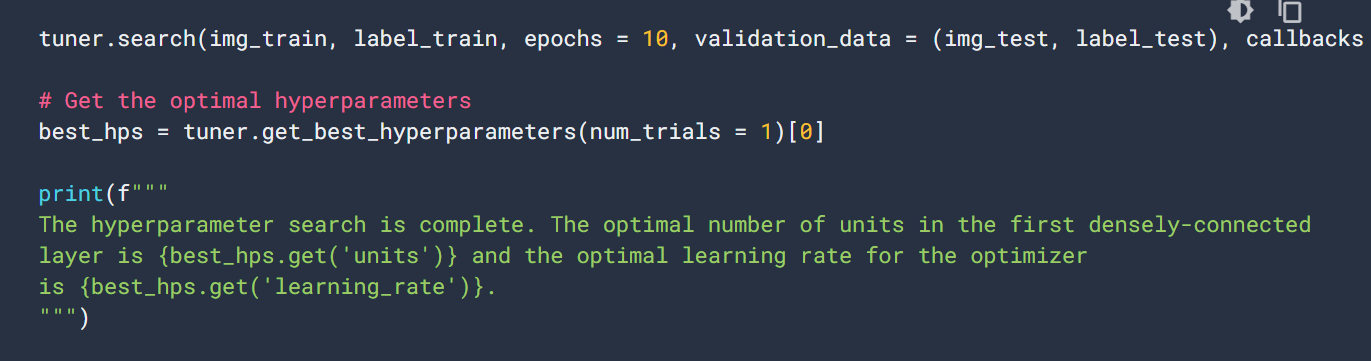

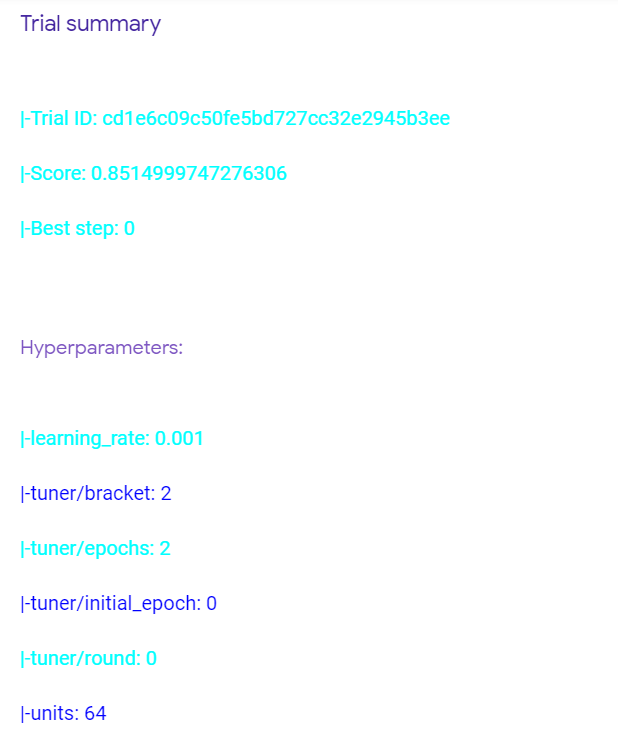

# Tuner Summary 
# =============
Prints the summary of the trials done

# GetBestModel returns the best model based on objective
# ==============================================

# models = tuner.get_best_models(num_models=2)

# Tuner . HyperModel . Build(best_hyperparams)

This helps us build the model with the best hyperparams obtained from tuner search

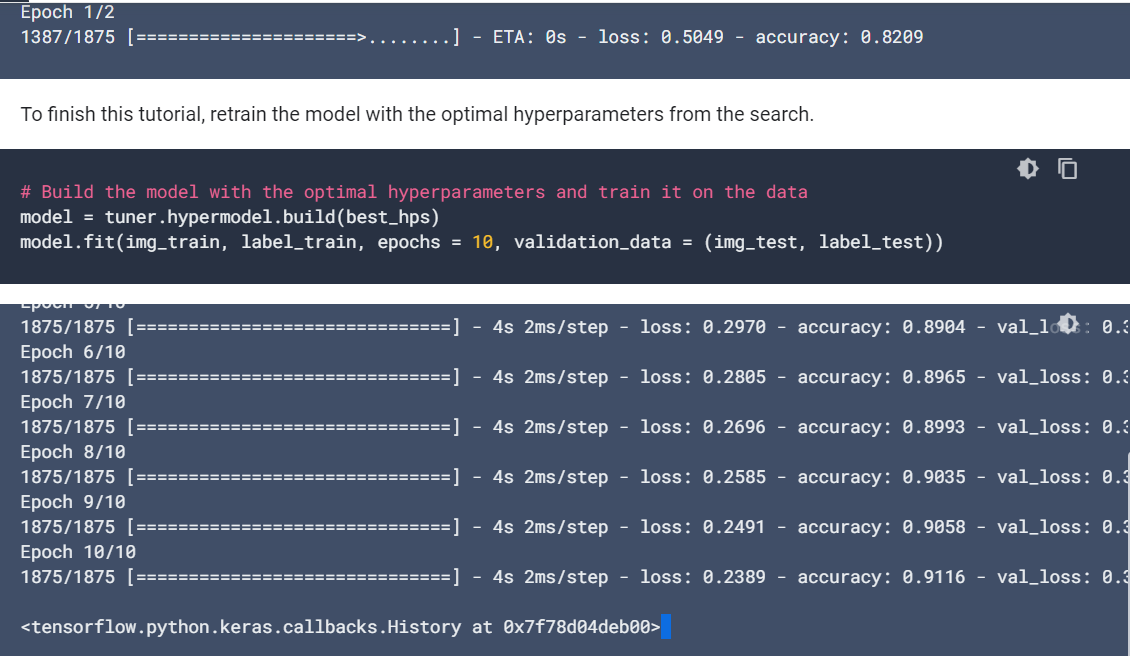

# Links for Reference 
# ================

https://medium.com/criteo-labs/hyper-parameter-optimization-algorithms-2fe447525903

https://medium.com/@am.benatmane/keras-hyperparameter-tuning-using-sklearn-pipelines-grid-search-with-cross-validation-ccfc74b0ce9f

